In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
data=pd.read_csv(r'\Datasets\BreastTissue.csv')
data

,Case #,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,3,car,551.879287,0.232478,0.063530,264.804935,11888.391830,44.894903,77.793297,253.785300,656.769449
3,4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...,...
101,102,adi,2000.000000,0.106989,0.105418,520.222649,40087.920980,77.059161,204.090347,478.517223,2088.648870
102,103,adi,2600.000000,0.200538,0.208043,1063.441427,174480.476200,164.071543,418.687286,977.552367,2664.583623
103,104,adi,1600.000000,0.071908,-0.066323,436.943603,12655.342130,28.963331,103.732704,432.129749,1475.371534
104,105,adi,2300.000000,0.045029,0.136834,185.446044,5086.292497,27.427344,178.691742,49.593290,2480.592151


In [3]:
data.shape

(106, 11)

In [4]:
data.describe()

,Case #,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,53.500000,784.251618,0.120133,0.114691,190.568642,7335.155161,23.473784,75.381258,166.710575,810.638127
std,30.743563,753.950075,0.068596,0.101347,190.801448,18580.314212,23.354672,81.345838,181.309580,763.019135
min,1.000000,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,27.250000,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,53.500000,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,79.750000,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,106.000000,2800.000000,0.358316,0.467748,1063.441427,174480.476200,164.071543,436.099640,977.552367,2896.582483


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Case #  106 non-null    int64  
 1   Class   106 non-null    object 
 2   I0      106 non-null    float64
 3   PA500   106 non-null    float64
 4   HFS     106 non-null    float64
 5   DA      106 non-null    float64
 6   Area    106 non-null    float64
 7   A/DA    106 non-null    float64
 8   Max IP  106 non-null    float64
 9   DR      106 non-null    float64
 10  P       106 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 9.2+ KB


In [6]:
target=data.Class
data=data.drop(['Case #','Class'],axis=1)
data

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,551.879287,0.232478,0.063530,264.804935,11888.391830,44.894903,77.793297,253.785300,656.769449
3,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...
101,2000.000000,0.106989,0.105418,520.222649,40087.920980,77.059161,204.090347,478.517223,2088.648870
102,2600.000000,0.200538,0.208043,1063.441427,174480.476200,164.071543,418.687286,977.552367,2664.583623
103,1600.000000,0.071908,-0.066323,436.943603,12655.342130,28.963331,103.732704,432.129749,1475.371534
104,2300.000000,0.045029,0.136834,185.446044,5086.292497,27.427344,178.691742,49.593290,2480.592151


In [7]:
df=data.corr()
df

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
I0,1.000000,-0.393647,0.028455,0.819606,0.560098,0.612070,0.823668,0.733252,0.988697
PA500,-0.393647,1.000000,0.509019,-0.089817,0.083547,0.229837,-0.050401,-0.077054,-0.345715
HFS,0.028455,0.509019,1.000000,0.106977,0.206059,0.356028,0.370827,0.011592,0.102362
DA,0.819606,-0.089817,0.106977,1.000000,0.731132,0.648334,0.753227,0.974202,0.774028
Area,0.560098,0.083547,0.206059,0.731132,1.000000,0.830172,0.735258,0.675810,0.574073
A/DA,0.612070,0.229837,0.356028,0.648334,0.830172,1.000000,0.812815,0.540695,0.679363
Max IP,0.823668,-0.050401,0.370827,0.753227,0.735258,0.812815,1.000000,0.600290,0.861837
DR,0.733252,-0.077054,0.011592,0.974202,0.675810,0.540695,0.600290,1.000000,0.665987
P,0.988697,-0.345715,0.102362,0.774028,0.574073,0.679363,0.861837,0.665987,1.000000


<AxesSubplot:>

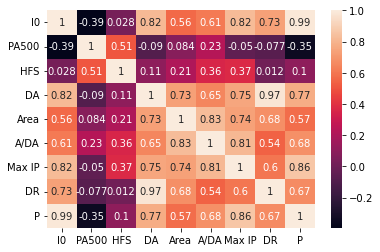

In [8]:
sns.heatmap(df,annot=True,fmt='.2g')

In [11]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

In [12]:
def corr_range(df,start=-1.0,stop=1.0):
    cols=[]
    for i in range(9):
        for j in range(9):
            if i!=j and (j,i) not in cols and df.iloc[i,j]>=start and df.iloc[i,j]<=stop:
                cols.append((i,j))
    for i in range(len(cols)):
        cols[i]=(df.columns[cols[i][0]],df.columns[cols[i][1]])
    return cols

def plot_set(df,cols):
    for c1,c2 in cols:
        plt.scatter(df[c1],df[c2])
        plt.show()

In [ ]:
plot_set(data,corr_range(df,0.8,0.9))

In [9]:
target.unique()

array(['car', 'fad', 'mas', 'gla', 'con', 'adi'], dtype=object)

In [10]:
target2 = pd.get_dummies(target)
target2

,adi,car,con,fad,gla,mas
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
101,1,0,0,0,0,0
102,1,0,0,0,0,0
103,1,0,0,0,0,0
104,1,0,0,0,0,0


In [11]:
targetLE=LabelEncoder()
targetLE.fit(target)
target=targetLE.transform(target)
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
x_tr,x_te,y_tr,y_te=train_test_split(data,target,random_state=123,test_size=0.2)

Logistic Regression (Multinomial)

In [13]:
m1=LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', max_iter=300)
m1.fit(x_tr,y_tr)
y_pr1=m1.predict(x_te)

C:\Users\Loges\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


The above output is a warning, since the dataset is small. The model works fine

Decision Tree

In [14]:
m2=DecisionTreeClassifier()
m2.fit(x_tr,y_tr)
y_pr2=m2.predict(x_te)

KNN Classifier

In [15]:
m3=KNeighborsClassifier()
m3.fit(x_tr,y_tr)
y_pr3=m3.predict(x_te)

Naive Bayes Classifier

In [16]:
m4=GaussianNB()
m4.fit(x_tr,y_tr)
y_pr4=m4.predict(x_te)

Logistic Regression (One vs Rest)

In [18]:
# x_tr2, x_te2, y_tr2, y_te2 = train_test_split()
m5 = LogisticRegression(multi_class = 'ovr', solver = 'newton-cg')
m5.fit(x_tr, y_tr)
y_pr5 = m5.predict(x_te)

C:\Users\Loges\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\Loges\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\Loges\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [19]:
print("Logistic Regression(Multinomial):",classification_report(y_te, y_pr1), sep='\n')
print("Decision Tree:",classification_report(y_te,y_pr2),sep='\n')
print("KNN:",classification_report(y_te,y_pr3),sep='\n')
print("GaussianNB:",classification_report(y_te,y_pr4),sep='\n')
print("Logistic Regression (One vs Rest):",classification_report(y_te, y_pr5), sep='\n')

Logistic Regression(Multinomial):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         1
           3       0.50      0.50      0.50         4
           4       0.00      0.00      0.00         2
           5       0.50      0.40      0.44         5

    accuracy                           0.64        22
   macro avg       0.63      0.62      0.62        22
weighted avg       0.66      0.64      0.65        22

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.56      1.00      0.71         5
           2       1.00      1.00      1.00         1
           3       0.33      0.25      0.29         4
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5

    accuracy                

C:\Users\Loges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Loges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Loges\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print("Logistic Regression(Multinomial):\n", accuracy_score(y_te, y_pr1))
print("Decision Tree:\n",accuracy_score(y_te,y_pr2))
print("KNN:\n",accuracy_score(y_te,y_pr3))
print("GaussianNB:\n",accuracy_score(y_te,y_pr4))
print("Logistic Regression(One vs Rest):\n", accuracy_score(y_te, y_pr5))

Logistic Regression(Multinomial):
 0.6363636363636364
Decision Tree:
 0.5454545454545454
KNN:
 0.5909090909090909
GaussianNB:
 0.5909090909090909
Logistic Regression(One vs Rest):
 0.7272727272727273
